In [10]:
# Import TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Embedding, Reshape, Concatenate, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, ReLU, LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Data manipulation
import numpy as np
print('numpy: %s' % np.__version__)

# Visualization
import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: %s' % matplotlib.__version__)
import graphviz
print('graphviz: %s' % graphviz.__version__)

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir = os.path.dirname(sys.path[0])
#print(main_dir)

numpy: 1.24.3
matplotlib: 3.7.1
graphviz: 0.20.1


Found 0 validated image filenames belonging to 0 classes.


/Users/ellienichols/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 78739 invalid image filename(s) in x_col="cover". These filename(s) will be ignored.
  warnings.warn(


Shape of X_train:  (0, 300, 300, 3)
Shape of y_train:  (0, 0)


IndexError: index 0 is out of bounds for axis 0 with size 0

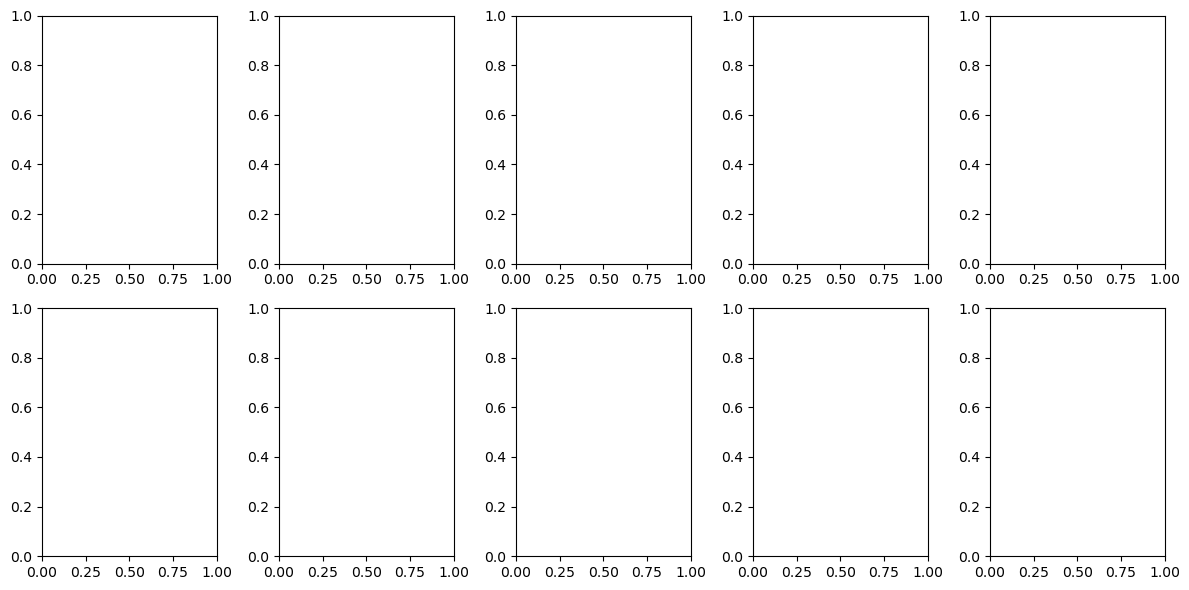

In [35]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras

# Load CSV dataset
df = pd.read_csv('genre_df.csv')

# Set the path for images
data_dir = './album_covers'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

batch_size = 8
target_size = (300, 300)

generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=data_dir,
    x_col="cover",
    y_col="genre",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# Access the first batch of data
(X_train, y_train) = generator.next()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

# Display images of the first 10 samples 
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12, 6), facecolor='white')
n = 0
for i in range(0, 2):
    for j in range(0, 5):
        axs[i, j].imshow(X_train[n])
        axs[i, j].set(title=y_train[n])
        axs[i, j].axis('off')
        n += 1
plt.show()

# Scale and reshape as required by the model
data = X_train.copy()
data = data.reshape(X_train.shape[0], 300, 300, 3)  # Assuming 3 channels (RGB)
data = (data - 127.5) / 127.5  # Normalize the images to [-1, 1]
print("Shape of the scaled array: ", data.shape)

